# 5. Arithmetic operations on images

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 5.1 Adding 2 images 

We can mix two images with differents methods in OpenCV. With `add` function, the output doesn't look as expected, because intensity of pixels is added, literally, passing the '255' limit, with a saturation efect. With `addWeight` we can smooth this efect, the weight of each image can be adjusted.


First of all, it is necessary that both images have same size to sum them. Most of the times, pictures will have different sizes so It is needed a way to resize one of them.

One way to do this is using the `cv2`'s method `resize(image_to_resize,(col,row))`.

(183, 275, 3)


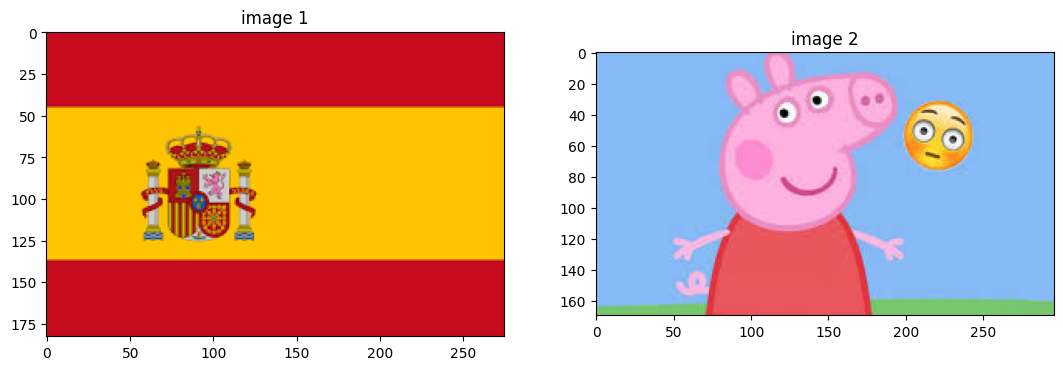

In [3]:
image_original1 = cv2.imread('imgs/paradrop.png')
image1 = image_original1.copy()

image_original2 = cv2.imread('imgs/index.jpeg')
image2 = image_original2.copy()


# RGB to BGR
image1 = cv2.cvtColor(image1, cv2.COLOR_RGB2BGR)
image2 = cv2.cvtColor(image2, cv2.COLOR_RGB2BGR)

fig, axes = plt.subplots(1, 2, figsize=(13, 13))

# Color image
axes[0].imshow(image1)
axes[0].set_title('image 1')
axes[1].imshow(image2)
axes[1].set_title('image 2')

print(image1.shape)


Flag image:     183 275 3
PepaPig Image:  183 275 3
Both images have same dimensions.


Text(0.5, 1.0, 'Weigthed')

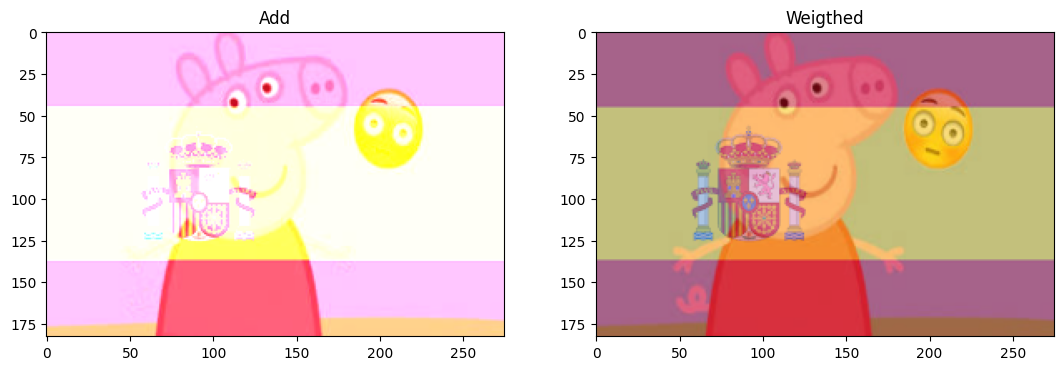

In [9]:
row, col, channels = image1.shape
image2_resized = cv2.resize(image2, (col, row))

print("Flag image:    ", row, col, channels)
row, col, channels = image2_resized.shape
print("PepaPig Image: ",row, col, channels)
print("Both images have same dimensions.")

image_added = cv2.add(image1, image2_resized)
image_weigthAdded = cv2.addWeighted(image1, 0.5, image2_resized, 0.5, 0)
fig, axes = plt.subplots(1, 2, figsize=(13, 13))
axes[0].imshow(image_added)
axes[0].set_title('Add')
axes[1].imshow(image_weigthAdded)
axes[1].set_title("Weigthed")

Using this representation, both of the images have the same weight.

There is a more elegant way to add to images giving weights to them. This can be achieve through the `cv2`'s method `addWeighted(image1,weight1,image2,weight2,alpha)` where the weights should be in range [0,1]

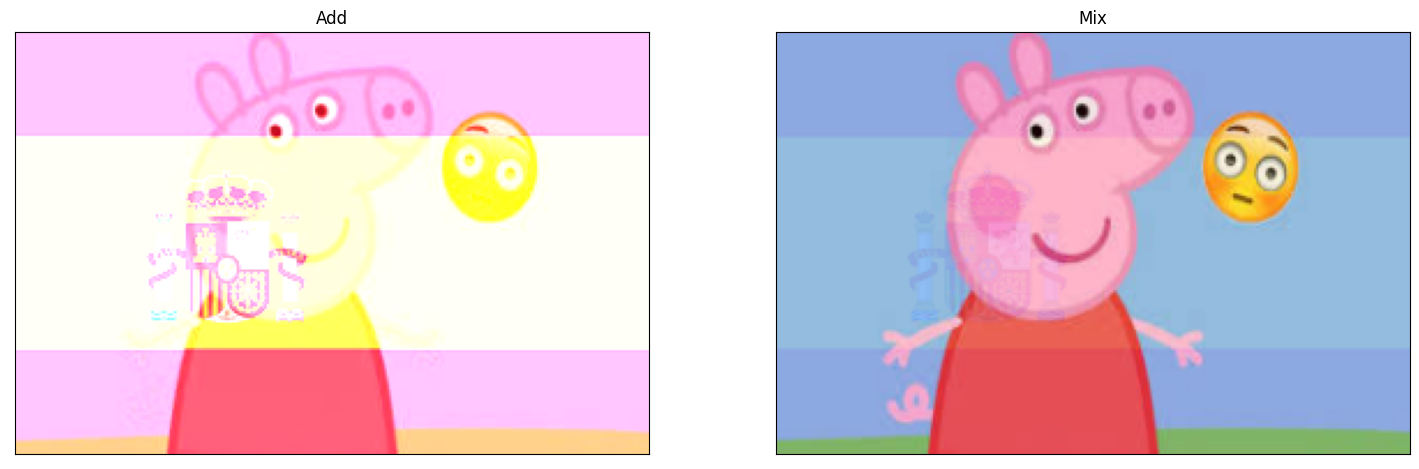

In [10]:
image_mixed = cv2.addWeighted(image1, 0.1, image2_resized, 0.9, 0)

# Represent the images
fig, axes = plt.subplots(1, 2, figsize=(18, 16))
axes[0].imshow(image_added)
axes[0].set_title('Add')
axes[1].imshow(image_mixed)
axes[1].set_title('Mix')
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])

In the code cell below, it is represented the sum of the images and the mix of them. 

This last one (mix) is so important. It is used to represent where is the ROI, highlighting it with a color for example.

### 5.1.1 Adding 2 images with no regular shape 



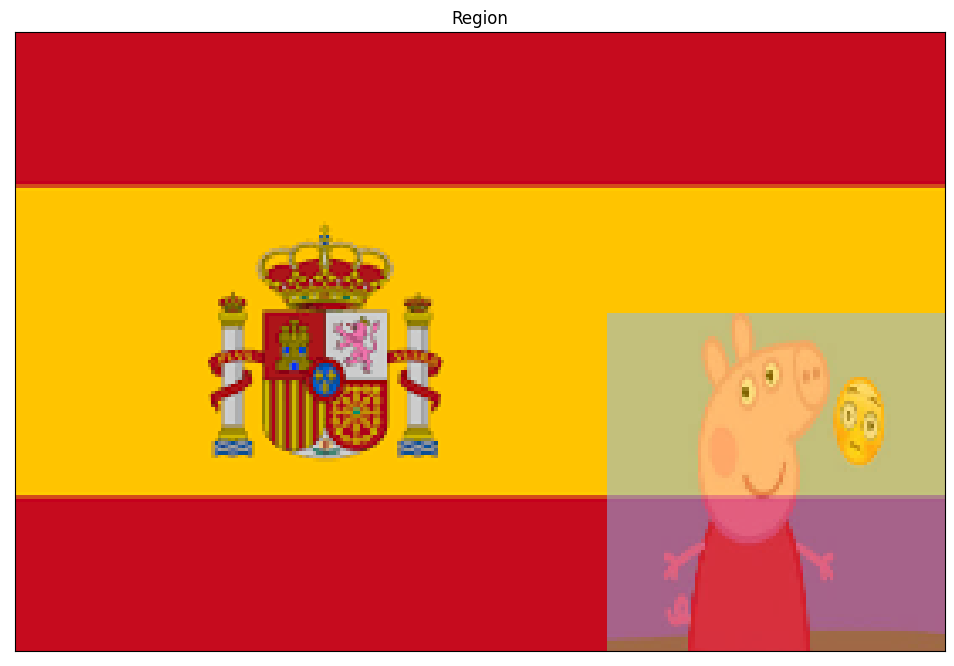

In [12]:
image_base = image1.copy()

image_top = cv2.resize(image2, (100, 100))

# Change one region for another with same size
image_base[83:183, 175:275] = cv2.addWeighted(image_base[83:183, 175:275], 0.5, image_top, 0.5, 0)  



fig, axes = plt.subplots(1, 1, figsize=(12, 12))
axes.imshow(image_base)
axes.set_title('Region')
plt.xticks([]), plt.yticks([]);  
# to hide tick values on X and Y axis



(183, 275, 3)
(100, 100, 3)


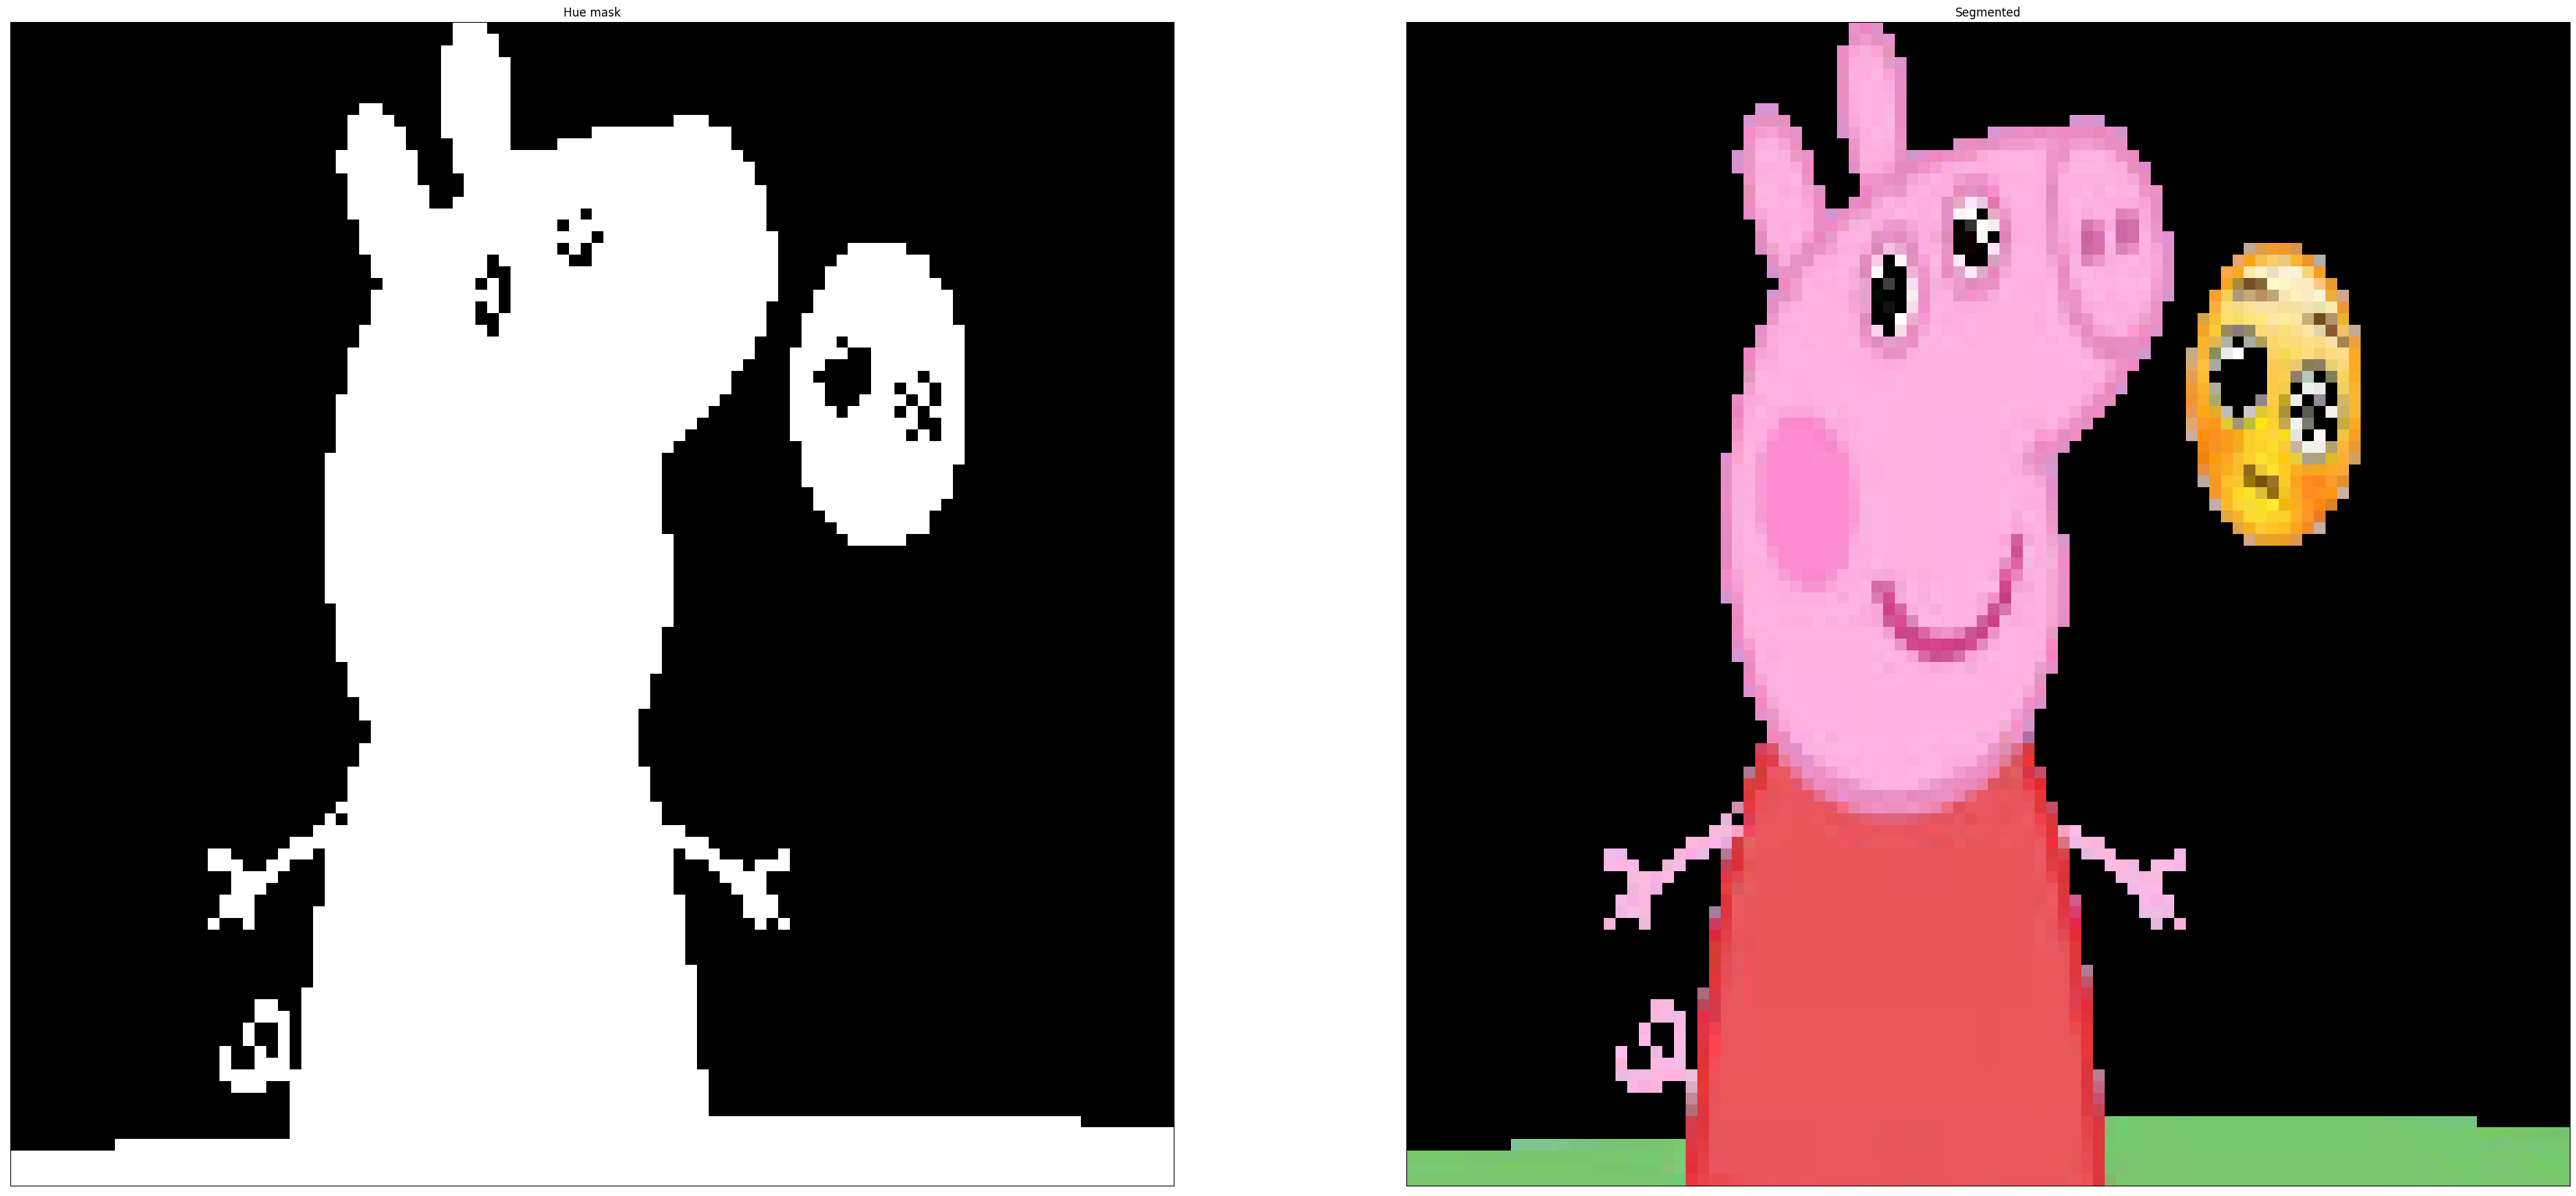

In [13]:
hsv2 = cv2.cvtColor(image_top, cv2.COLOR_BGR2HSV)
hue2 = hsv2 [:,:,0] # Hue channel


mask = cv2.inRange(hue2, 50, 150)
image_no_background = cv2.bitwise_and(image_top, image_top, mask=mask)

# Represent with matplotlib the image. We can obtain his pixel values and coordinates.
fig, axes = plt.subplots(1, 2, figsize=(48, 48))
axes[0].imshow(mask,cmap = 'gray')
axes[0].set_title('Hue mask')
axes[1].imshow(image_no_background)
axes[1].set_title('Segmented')
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])


    

print(image_base.shape)
print(image_top.shape)

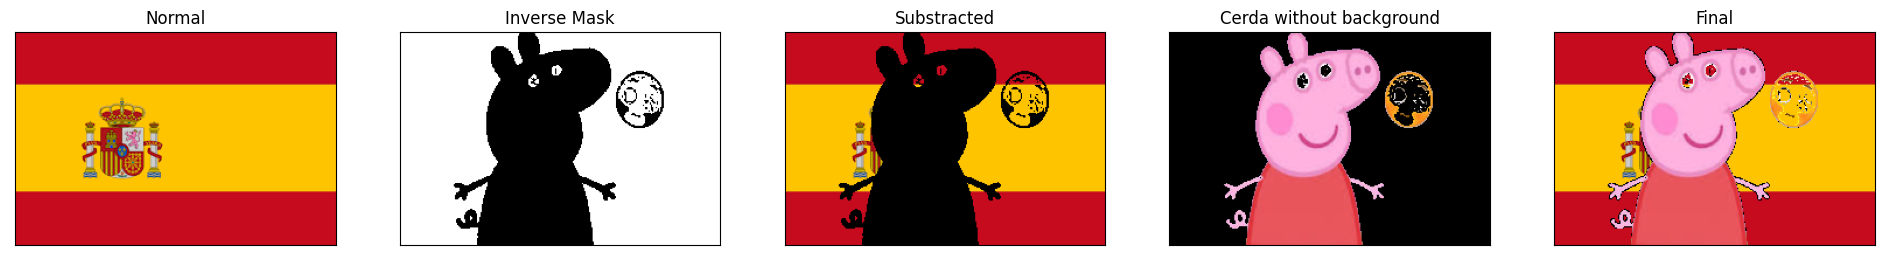

In [14]:
#Adaptamos la imagen al tamanho de la bandera de ESPAÑITA <3
#Obtenemos el hue para extraer la imagen de la cerda
#En este caso la cerda sera background (mas adelante explico por qué)
image2_resized = cv2.resize(image2, (col, row))
hsv2 = cv2.cvtColor(image2_resized, cv2.COLOR_BGR2HSV)
hue2 = hsv2 [:,:,0] # Hue channel
cv2.imshow("tt", hue2)
cv2.waitKey(0)
#Hacemos bitwise_and para eliminar de la bandera de ESPAÑITA :( los 
#pixeles que pertenecen a la mascara de la cerda

mask = cv2.inRange(hue2, 100, 150)
inverse = cv2.inRange(hue2, 0, 100)
cerda = cv2.inRange(hue2, 100, 150)
image_no_background = cv2.bitwise_and(image2_resized, image2_resized, mask=mask)
cutted = cv2.bitwise_and(image1, image1, mask=inverse)
image_joinerd = cv2.bitwise_or(cutted, image_no_background)
# time to mixed it up


fig, axes = plt.subplots(1, 5, figsize=(24, 18))
axes[0].imshow(image1, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Normal')
axes[1].imshow(inverse, cmap = "gray", vmin=0, vmax=255)
axes[1].set_title('Inverse Mask')
axes[2].imshow(cutted, cmap='gray', vmin=0, vmax=255)
axes[2].set_title('Substracted')
axes[3].imshow(image_no_background, vmin=0, vmax=255)
axes[3].set_title('Cerda without background')
axes[4].imshow(image_joinerd, cmap='gray', vmin=0, vmax=255)
axes[4].set_title('Final')
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])